# Goals

1)Here we are working with chip-seq-to-work dataframe 
(~43k samples) and GSM_SRR_address dataframe (~42k samples)

2)We will filter the inputs/control samples at the first moment using title and source-cell columns

3)We will check how many GSE have control samples and traits samples.

4)we will looking for some targets in the title column to update the antibody column



In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_rows', 20)

#~43k samples
df_chipseq_parsed = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/Chip-seq-parsed-complete_towork.csv')

#~42k samples
df_gsm_srx = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/gsm-srx-srr-complete.csv')



In [4]:
#creating a list of final gsm to work and then filter the chip-seq-parsed df

list_gsm_srx = df_gsm_srx['GSM'].tolist()
print(len(list_gsm_srx))

42041


In [5]:
#Final table 

final_df_to_work = df_chipseq_parsed[df_chipseq_parsed['GSM'].isin(list_gsm_srx)]

In [6]:
#see which samples are not included in this dataframe

final_gsm_list = final_df_to_work['GSM'].tolist()


In [7]:
dif_list = list(set(list_gsm_srx) - set(final_gsm_list))

In [8]:
dif_list

['GSM2760338',
 'GSM2433017',
 'GSM548871',
 'GSM1039554',
 'GSM2990358',
 'GSM916050',
 'GSM1039530',
 'GSM3938144',
 'GSM1517626',
 'GSM548888',
 'GSM1387801',
 'GSM2664378',
 'GSM1112815',
 'GSM1278007',
 'GSM548904',
 'GSM3495093',
 'GSM684592',
 'GSM1348226',
 'GSM1280529']

# Categorizing controls and samples in a new column using Title and source cell column

1) Issue: We have false positive in control samples. We have some samples that have control term in source cell column, however the sample is a trait sample. The correct classification is in the title. 

In [12]:
import re 


list_categories = []


patterns = [r"\bcontrol\b",r"\binput\b",r"[-_]?(input)[_-]?", r"[-_]?(Control)[_-]?", 
            r"\bctrl\b", r"[-_]?(ctrl)[_-]?", r"\bctl\b", r"[-_]?(ctl)[_-]?"]

compiled_combined = re.compile('|'.join(x for x in patterns), re.IGNORECASE)


for index, row in final_df_to_work.iterrows():
    if re.search(compiled_combined, row['Title']) or re.search(compiled_combined, row['source-cell']):
#         print(row['Title'] ,"::", row['source-cell'])
        list_categories.append('Control')
        

    else:       
#         print(row['Title'])
        list_categories.append('Trait')
    
        
       
        
print(len(list_categories))   


#we have 7911 controls

42022


In [13]:
list_categories.count('Control')

7911

In [14]:
final_df_to_work['Categories'] = list_categories

/Users/gfrosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
final_df_to_work.iloc[:10]

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories
0,H3K4me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290887,ChIP-Seq,NaN,NaN,Trait
1,H3K27me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290888,ChIP-Seq,NaN,NaN,Trait
2,h3k4me_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097929,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
3,h3k4me3_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097930,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
4,h3k27ac_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097931,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
5,input_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097932,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Control
6,rb IgG_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097933,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
7,TF ChIP-seq from K562 (ENCLB349LZT),NaN,Homo sapiens,Homo sapiens K562 cell line genetically modifi...,GSE136477,GSM4051004,ChIP-Seq,eGFP-VEZF1,K562,Trait
8,TF ChIP-seq from K562 (ENCLB988UUL),NaN,Homo sapiens,Homo sapiens K562 cell line genetically modifi...,GSE136477,GSM4051005,ChIP-Seq,eGFP-VEZF1,K562,Trait
11,GS187 MM1 H3K27ac ChIPseq rep1,Acute myeloid leukemia (AML),Homo sapiens,AML cell line MM1,GSE128259,GSM3669483,ChIP-Seq,NaN,MM1,Trait


In [16]:
categ_df = final_df_to_work.groupby('Categories').nunique()

In [17]:
categ_df

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories
Categories,,,,,,,,,,
Control,7720,811,1,2685,1602,7911,1,187,972,1
Trait,33995,1221,1,7389,4961,34111,1,2235,1430,1


In [38]:
final_df_to_work.nunique()

Title              41714
cell type           1237
organism               1
source-cell         8479
GSE                 5004
GSM                42022
Library                1
Target-antibody     2283
Cell line           1451
Categories             2
dtype: int64

In [39]:
#dataframe to save
#Work in title column to recover the targets and add into Target-antibody


final_df_to_work

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories
0,H3K4me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290887,ChIP-Seq,NaN,NaN,Trait
1,H3K27me3_scChIPseq_Jurkat-Ramos,NaN,Homo sapiens,Jurkat-Ramos,GSE117309,GSM3290888,ChIP-Seq,NaN,NaN,Trait
2,h3k4me_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097929,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
3,h3k4me3_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097930,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
4,h3k27ac_WON3029,peripheral nervous system tumor cell,Homo sapiens,CHP-134 neuroblastoma cells,GSE113139,GSM3097931,ChIP-Seq,NaN,CHP-134 neuroblastoma cells,Trait
...,...,...,...,...,...,...,...,...,...,...
43913,GATA1-A,NaN,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970258,ChIP-Seq,NaN,NaN,Trait
43914,PolII-F (HiSeq 2000),NaN,Homo sapiens,Human primary fetal proerythroblasts (ProEs),GSE36985,GSM970259,ChIP-Seq,NaN,NaN,Trait
43915,PolII-A (HiSeq 2000),NaN,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970260,ChIP-Seq,NaN,NaN,Trait
43916,IRF2-A,NaN,Homo sapiens,Human primary adult proerythroblasts (ProEs),GSE36985,GSM970261,ChIP-Seq,NaN,NaN,Trait


In [ ]:
#GSE venn Diagram (control x trait) to check the intersection
#It doesn't make sense if there are GSEs with just controls.

In [27]:
#Getting the GSE lists 

GSE_control_list = []
GSE_trait_list = []

for index, row in final_df_to_work.iterrows():
    if 'Control'in row['Categories']:
#         print(row['Title'])
        GSE_control_list.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_list.append(row['GSE'])

In [28]:
#length ok

print(len(GSE_control_list))
print(len(GSE_trait_list))

7911
34111


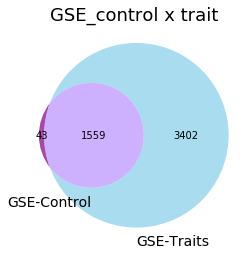

<Figure size 576x432 with 0 Axes>

In [31]:
#GSE Venn Diagram 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns


set_gse_control = set(GSE_control_list)
set_gse_trait = set(GSE_trait_list)


##Checked
# print(len(set_gse_control))
# print(len(set_gse_trait))

venn_GSE_ctrl_trt = venn2([set_gse_control, set_gse_trait], set_labels = ('GSE-Control', 'GSE-Traits'), 
                                        set_colors=('purple', 'skyblue'), alpha = 0.7)


for text in venn_GSE_ctrl_trt.set_labels:
    text.set_fontsize(14)
# for text in venn_gsm_ngs_geodb_NCBI_chip.subset_labels:
#     text.set_fontsize(12)


plt.title('GSE_control x trait', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()


In [36]:
#Getting the 43 GSE-control unique list and check manually 

control_unique_set = set_gse_control.difference(set_gse_trait)
control_unique_list = list(control_unique_set)

In [37]:
print(len(control_unique_list))

43


In [40]:
control_unique_list

['GSE61487',
 'GSE136494',
 'GSE136468',
 'GSE136495',
 'GSE136487',
 'GSE59692',
 'GSE135127',
 'GSE30902',
 'GSE136501',
 'GSE136482',
 'GSE139741',
 'GSE136514',
 'GSE136465',
 'GSE139699',
 'GSE139734',
 'GSE139799',
 'GSE79563',
 'GSE139726',
 'GSE60269',
 'GSE136426',
 'GSE89728',
 'GSE132426',
 'GSE139800',
 'GSE136531',
 'GSE136523',
 'GSE136515',
 'GSE139794',
 'GSE139739',
 'GSE139713',
 'GSE31363',
 'GSE136498',
 'GSE136428',
 'GSE136429',
 'GSE136472',
 'GSE136507',
 'GSE136527',
 'GSE136555',
 'GSE136528',
 'GSE139702',
 'GSE139753',
 'GSE139766',
 'GSE69183',
 'GSE139748']

In [43]:
final_df_to_work[final_df_to_work['GSE'].str.contains('GSE136494')]


,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories
1245,Control ChIP-seq from K562 (ENCLB387XIP),NaN,Homo sapiens,Homo sapiens K562 cell line,GSE136494,GSM4051078,ChIP-Seq,Control,K562,Control
1246,Control ChIP-seq from K562 (ENCLB749CPZ),NaN,Homo sapiens,Homo sapiens K562 cell line,GSE136494,GSM4051079,ChIP-Seq,Control,K562,Control


# Version 2 - Categorizing controls and samples in a new column using just Title column

In [44]:
import re 


list_categories_v2 = []


patterns = [r"\bcontrol\b",r"\binput\b",r"[-_]?(input)[_-]?", r"[-_]?(Control)[_-]?", 
            r"\bctrl\b", r"[-_]?(ctrl)[_-]?", r"\bctl\b", r"[-_]?(ctl)[_-]?"]

compiled_combined = re.compile('|'.join(x for x in patterns), re.IGNORECASE)


for index, row in final_df_to_work.iterrows():
    if re.search(compiled_combined, row['Title']):
#         print(row['Title'] ,"::", row['source-cell'])
        list_categories_v2.append('Control')
        

    else:       
#         print(row['Title'])
        list_categories_v2.append('Trait')
    
        
       
        
print(len(list_categories_v2))   


#Version 1 = we have 7911 controls

42022


In [45]:
#In this version using just Title column (field related to samples) we recovery 7767 control samples 
#Less 144 control samples

list_categories_v2.count('Control')

7767

In [47]:
#inserting the new column to final df


final_df_to_work['Categories_v2'] = list_categories_v2

/Users/gfrosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Saving final_df_to_work with two categories columns






In [71]:
final_df_to_work.to_csv(r'final_df_to_work_42022samples.csv', index = False)

In [56]:
#df_v1_minus_v2_cat = final_df_to_work['Categories'].sub(final_df_to_work['Categories_v2'], axis=0) 

# df1[ ~df1['A'].isin(df2['A'])]
df_v1_minus_v2_cat = final_df_to_work[final_df_to_work['Categories'] != final_df_to_work['Categories_v2']]

In [65]:
df_v1_minus_v2_cat

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
871,H3K27ac ChIP seq in SEM cells treated with DMSO,Paediatric pro B-cell line derived from ALL wi...,Homo sapiens,H3K27ac_Control,GSE117865,GSM3312817,ChIP-Seq,NaN,Leukemia cell line (SEM),Control,Trait
875,H3K79me3 ChIP seq in SEM cells treated with DMSO,Paediatric pro B-cell line derived from ALL wi...,Homo sapiens,H3K79me3_Control,GSE117865,GSM3312821,ChIP-Seq,NaN,Leukemia cell line (SEM),Control,Trait
1593,10-inp-mice-breast_S4,NaN,Homo sapiens,"Only mice breast tissue, Input control, ie no IP",GSE101407,GSM2702121,ChIP-Seq,NaN,NaN,Control,Trait
1596,8-inp-C_S10,NaN,Homo sapiens,"Mice treated with NaCl only, Input control, ie...",GSE101407,GSM2702124,ChIP-Seq,NaN,NaN,Control,Trait
1597,9-inp-ICI_S2,NaN,Homo sapiens,"Mice treated with ICI, Input control, ie no IP",GSE101407,GSM2702125,ChIP-Seq,NaN,NaN,Control,Trait
...,...,...,...,...,...,...,...,...,...,...,...
41956,WCE_U937bio_r1_100709_6,NaN,Homo sapiens,Input ChIP-Seq U937 BIO,GSE29195,GSM722430,ChIP-Seq,NaN,U937,Control,Trait
41957,WCE_U937bmp4_r1_100608_3,NaN,Homo sapiens,Input ChIP-Seq U937 BIO,GSE29195,GSM722431,ChIP-Seq,NaN,U937,Control,Trait
41958,WCE_U937dmso_r1_100505_3,NaN,Homo sapiens,Input ChIP-Seq U937 DMSO,GSE29195,GSM722432,ChIP-Seq,NaN,U937,Control,Trait
42960,RUNX1_Kasumi-1_ChIPSeq,Kasumi-1,Homo sapiens,Kasumi-1 control,GSE29222,GSM722704,ChIP-Seq,ab23980 (lot number728911),NaN,Control,Trait


In [64]:
df_v1_minus_v2_cat.nunique()

Title              144
cell type           27
organism             1
source-cell         90
GSE                 46
GSM                144
Library              1
Target-antibody     12
Cell line           23
Categories           1
Categories_v2        1
dtype: int64

In [58]:
#Getting the GSE lists V2

GSE_control_list_v2 = []
GSE_trait_list_v2 = []

for index, row in final_df_to_work.iterrows():
    if 'Control'in row['Categories_v2']:
#         print(row['Title'])
        GSE_control_list_v2.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_list_v2.append(row['GSE'])

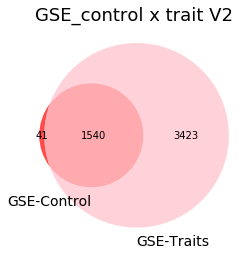

<Figure size 576x432 with 0 Axes>

In [62]:
#GSE Venn Diagram v2

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns


set_gse_control_v2 = set(GSE_control_list_v2)
set_gse_trait_v2 = set(GSE_trait_list_v2)


##Checked
# print(len(set_gse_control))
# print(len(set_gse_trait))

venn_GSE_ctrl_trt_v2 = venn2([set_gse_control_v2, set_gse_trait_v2], set_labels = ('GSE-Control', 'GSE-Traits'), 
                                        set_colors=('red', 'pink'), alpha = 0.7)


for text in venn_GSE_ctrl_trt_v2.set_labels:
    text.set_fontsize(14)
# for text in venn_gsm_ngs_geodb_NCBI_chip.subset_labels:
#     text.set_fontsize(12)


plt.title('GSE_control x trait V2', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()



In [66]:
categ_df_v2 = final_df_to_work.groupby('Categories_v2').nunique()

In [69]:
categ_df_v2 

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
Categories_v2,,,,,,,,,,,
Control,7576,798,1,2610,1581,7767,1,176,966,1,1
Trait,34138,1225,1,7479,4963,34255,1,2241,1430,2,1


In [68]:
final_df_to_work.nunique()

Title              41714
cell type           1237
organism               1
source-cell         8479
GSE                 5004
GSM                42022
Library                1
Target-antibody     2283
Cell line           1451
Categories             2
Categories_v2          2
dtype: int64